__________

#### AGENDA:

1. Multiagent: Supervisor architecture
1. Human in the Loop - Langgraph workflow

#### Network / Collab Multiagent architecture:

```
    question ---->  Hotel Booking               Flight Booking
                    _____________              ______________
                    |   LLM     |              |    LLM     | 
                    |   | |     |              |    | |     |
                    |   | |     | <----------- |    | |     |
                    |   | |     | -----------> |    | |     |
                    |   | |     |              |    | |     |
                    |   Tool    |              |    Tool    |
                    _____________              ______________
                        Agent 1                     Agent 2
                               /\ \           /\ /
                                \  \          / /
                                 \ \/        / \/
                                 Iternary Planner
                                _____________              
                                |   LLM     |              
                                |  /| |     |             
                                |   | |     |              
                                |   | |     |              
                                |   | |/    |              
                                |   Tool    |          
                                _____________              
                                    Agent 3                 
Handng off the task from one agent to each other based on the complexity of the task.

```

#### Supervisor Multiagent Architecture:


```
                        -------------
       Query ---->      |Supervisor |  <---- Leader
                        |  Agent    |---------------------|
                        -------------                     |
                       //     ||     \\                   |
                      //      ||      \\                  | 
                     //       ||       \\                 \/ 
              ----------   ----------   ----------     --------
              |        |   |        |   |        |     |      |
              | Agent 1|   | Agent 2|   | Agent 3|     | end  |
              ----------   ----------   ----------     --------
               Marketing      Sales         HR

```

Supervisor - clean implementation vs Network - complexity increases


_________

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langchain_groq import ChatGroq

In [4]:
llm = ChatGroq(model="deepseek-r1-distill-llama-70b")

In [5]:
response = llm.invoke("What is the capital of France?")

In [6]:
response.content

'<think>\n\n</think>\n\nThe capital of France is Paris.'

In [7]:
import os 
from langchain_community.tools import TavilySearchResults

TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
search_tool = TavilySearchResults(api_key=TAVILY_API_KEY)

/var/folders/dv/7swn0_8d5434v2xwcvtw_vsc0000gn/T/ipykernel_51044/2129140032.py:5: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  search_tool = TavilySearchResults(api_key=TAVILY_API_KEY)


In [8]:
search_tool.invoke("What is the weather in Tokyo?")

[{'title': 'Tokyo weather in October 2025 - Weather25.com',
  'url': 'https://www.weather25.com/asia/japan/tokyo?page=month&month=October',
  'content': 'weather25.com\nSearch\nweather in Japan\nRemove from your favorite locations\nAdd to my locations\nShare\nweather in Japan\n\n# Tokyo weather in October 2025\n\nThe temperatures in Tokyo in October are comfortable with low of 15°C and and high up to 22°C.\n\nYou can expect about 3 to 8 days of rain in Tokyo during the month of October. It’s a good idea to bring along your umbrella so that you don’t get caught in poor weather. [...] | 26 Cloudy 22° /15° | 27 Patchy rain possible 20° /16° | 28 Cloudy 21° /16° | 29 Moderate rain 20° /15° | 30 Sunny 20° /15° | 31 Sunny 21° /16° |  | [...] Partly cloudy\nSunny\nPartly cloudy\nLight rain shower\nPartly cloudy\nLight rain shower\nPatchy rain possible\nPartly cloudy\nHeavy rain\nCloudy\nOvercast\nOvercast\nPartly cloudy\nOvercast\nLight drizzle\nLight drizzle\nPatchy rain possible\nPatchy rai

#### Supervisor MultiAgent Architecture:

```
                        -------------
       Query ---->      |Supervisor |  <---- Leader
                        |  Agent    |-------|
                        -------------       |             
                       //     ||            |           
                      //      ||            |            
                     //       ||            \/          
              ----------   ----------   ----------
              |        |   |        |   |        |     
              | Agent 1|   | Agent 2|   | End    |     
              ----------   ----------   ----------    
          Reasearch Agent    Analyst         

```

In [9]:
from langchain_experimental.utilities import PythonREPL

In [10]:
mycode = """
x = 10
y = x + 10
print(y)
"""

In [11]:
repl = PythonREPL()
result = repl.run(mycode)
print(result)

Python REPL can execute arbitrary code. Use with caution.


20



In [12]:
# Running the below code throws an error because currently repl is not used as an Agentic tool it is merely a utility function imported.

# repl.invoke(code)

# ---------------------------------------------------------------------------
# AttributeError                            Traceback (most recent call last)
# Cell In[19], line 1
# ----> 1 repl.invoke(code)

# File ~/Documents/AGENTIC_AI_Krish_Naik/venv/lib/python3.13/site-packages/pydantic/main.py:991, in BaseModel.__getattr__(self, item)
#     988     return super().__getattribute__(item)  # Raises AttributeError if appropriate
#     989 else:
#     990     # this is the current error
# --> 991     raise AttributeError(f'{type(self).__name__!r} object has no attribute {item!r}')

# AttributeError: 'PythonREPL' object has no attribute 'invoke'

In [13]:
from typing import Annotated
from langchain_core.tools import tool

In [14]:
@tool
def python_repl_tool(code: Annotated[str, "The python code to execute to generate your chart"]):
    """ 
    Use this tool to execute python code and do math. if you want to see the output of a value, you should print out with `print(...)`. This is visible to the user.
    """
    try: 
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed: \n```python\n{code}\n```\nStdout: {result}"
    return result_str

In [15]:
python_repl_tool.invoke("x = 10\ny = x + 10\nprint(y)")

'Successfully executed: \n```python\nx = 10\ny = x + 10\nprint(y)\n```\nStdout: 20\n'

In [16]:
python_repl_tool.invoke(mycode)


'Successfully executed: \n```python\n\nx = 10\ny = x + 10\nprint(y)\n\n```\nStdout: 20\n'

#### We have Two Sub Agents:
1. Researcher  - internet
2. Coder - excuting the code

In [17]:
members=["researcher", "coder"]

In [18]:
options = members + ["FINISH"]

In [19]:
options

['researcher', 'coder', 'FINISH']

In [20]:
from typing import TypedDict, Literal
# from typing import Literal
# from pydantic import BaseModel

In [21]:

# There is no Routing Logic, simply returns the next agent.
# The ```next``` contains the name of the next agent to be called.
class Router(TypedDict):
    next : Literal["researcher", "coder", "FINISH"]

# class Router(BaseModel):
#     next: Literal["researcher", "coder", "FINISH"]

In [22]:
from langgraph.graph import MessagesState, START, END, StateGraph

In [23]:
class State(MessagesState):
    next: str

In [24]:
# This is how our state looks like:
state = {"messages": ["What is the square root of 42?"], "next": "research_agent"}

In [25]:
system_prompt = f"""You are a supervisor, tasked with managing a conversation between the following workers: {members}.
Given the following user request, respond with the worker to act next.
Each worker will perform a task and respond with their results and status.

IMPORTANT ROUTING RULES:
1. If the user's question is about CALCULATIONS, MATH, or CODE, route to 'coder'
2. If the user's question is about RESEARCH, FACTS, or INFORMATION, route to 'researcher'  
3. If BOTH agents have already provided complete answers, or if the question has been fully answered, respond with 'FINISH'
4. Look at the conversation history - if an agent has already provided a satisfactory answer, respond with 'FINISH'

When finished, respond with FINISH."""

In [26]:
system_prompt

"You are a supervisor, tasked with managing a conversation between the following workers: ['researcher', 'coder'].\nGiven the following user request, respond with the worker to act next.\nEach worker will perform a task and respond with their results and status.\n\nIMPORTANT ROUTING RULES:\n1. If the user's question is about CALCULATIONS, MATH, or CODE, route to 'coder'\n2. If the user's question is about RESEARCH, FACTS, or INFORMATION, route to 'researcher'  \n3. If BOTH agents have already provided complete answers, or if the question has been fully answered, respond with 'FINISH'\n4. Look at the conversation history - if an agent has already provided a satisfactory answer, respond with 'FINISH'\n\nWhen finished, respond with FINISH."

In [27]:
# This is how our final message looks like:

messages = [{"role": "system", "content": system_prompt},] + state["messages"]
messages

[{'role': 'system',
  'content': "You are a supervisor, tasked with managing a conversation between the following workers: ['researcher', 'coder'].\nGiven the following user request, respond with the worker to act next.\nEach worker will perform a task and respond with their results and status.\n\nIMPORTANT ROUTING RULES:\n1. If the user's question is about CALCULATIONS, MATH, or CODE, route to 'coder'\n2. If the user's question is about RESEARCH, FACTS, or INFORMATION, route to 'researcher'  \n3. If BOTH agents have already provided complete answers, or if the question has been fully answered, respond with 'FINISH'\n4. Look at the conversation history - if an agent has already provided a satisfactory answer, respond with 'FINISH'\n\nWhen finished, respond with FINISH."},
 'What is the square root of 42?']

In [28]:
llm_with_structured_output = llm.with_structured_output(Router)
llm_with_structured_output.invoke(messages)

# output:
# {'next': 'researcher'}

{'next': 'coder'}

In [29]:
from langgraph.types import Command

In [30]:
def supervisor_agent(state: State) -> Command [Literal["researcher", "coder", "__end__"]]:
    messages = [{"role": "system", "content": system_prompt}] + state["messages"]

    llm_with_structured_output = llm.with_structured_output(Router)

    response = llm_with_structured_output.invoke(messages)

    # This is how our response looks like:
    # # {'next': 'researcher'}
    
    # This is my next worker agent
    goto = response["next"]

    print("*"*5 + " BELOW IS MY GOTO " + "*"*5)
    print(goto)

    if goto == "FINISH":
        goto = END
    
    # class State(MessagesState):
    #     next: str
    # output of the state will be:
    # {'messages': ['What is the square root of 42?'], 'next': 'researcher'}

    return Command(goto=goto, update={"next":goto})


# This is how our state looks like:
state = {"messages": ["What is the square root of 42?"], "next": "research_agent"}

supervisor_agent(state)

***** BELOW IS MY GOTO *****
coder


Command(update={'next': 'coder'}, goto='coder')

In [31]:
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import BaseMessage, HumanMessage

In [32]:
def researcher_agent(state: State) -> Command [Literal["supervisor"]]:
    research_agent = create_react_agent(llm, tools = [search_tool], prompt = "You are a researcher. DO not do any math.")
    result = research_agent.invoke(state)
    
    return Command(update = {"messages": [HumanMessage(content=result["messages"][-1].content, name="researcher")]}, goto = "supervisor",)

In [33]:
def coder_agent(state: State) -> Command [Literal["supervisor"]]:
    code_agent = create_react_agent(llm, tools=[python_repl_tool], prompt = "you are a coder. DO NOT do any research.")
    result = code_agent.invoke(state)

    return Command(update = {"messages": [HumanMessage(content=result["messages"][-1].content, name="coder")]}, goto = "supervisor",)

In [34]:
graph = StateGraph(State)

In [35]:
graph.add_node("supervisor", supervisor_agent)
graph.add_node("researcher", researcher_agent)
graph.add_node("coder", coder_agent)

In [36]:
graph.add_edge(START, "supervisor")

In [37]:
app = graph.compile()

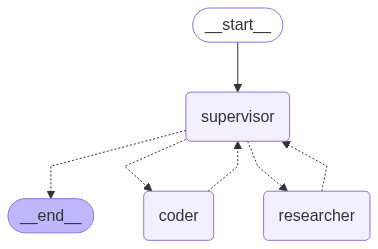

In [38]:
from IPython.display import Image
display(Image(app.get_graph().draw_mermaid_png()))

In [39]:
for s in app.stream({"messages":[("user","What is the square root of 16?")]}, subgraphs = True):
    print (s)
    print("*********** BELOW IS MY STATE ***********")

***** BELOW IS MY GOTO *****
coder
((), {'supervisor': {'next': 'coder'}})
*********** BELOW IS MY STATE ***********
(('coder:3eccf921-a766-0e5d-5823-4d88075509a9',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '1fjczp5xs', 'function': {'arguments': '{"code":"import math\\nprint(math.sqrt(16))"}', 'name': 'python_repl_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 339, 'prompt_tokens': 187, 'total_tokens': 526, 'completion_time': 1.325791766, 'prompt_time': 0.012476525, 'queue_time': 0.057319553999999995, 'total_time': 1.3382682909999999}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_76307ac09b', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--075d6cea-bf3c-41a8-a184-cb33c6fdae58-0', tool_calls=[{'name': 'python_repl_tool', 'args': {'code': 'import math\nprint(math.sqrt(16))'}, 'id': '1fjczp5xs', 'type': 'tool_call'}], usage_metadata={'input_tokens': 187, 'output_to

Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel branch:to:__end__, ignoring it.


***** BELOW IS MY GOTO *****
FINISH
((), {'supervisor': {'next': '__end__'}})
*********** BELOW IS MY STATE ***********


In [40]:
for s in app.stream({"messages":[("user","What is the meaning of life?")]}, subgraphs = True):
    print (s)
    print("*********** BELOW IS MY STATE ***********")

***** BELOW IS MY GOTO *****
researcher
((), {'supervisor': {'next': 'researcher'}})
*********** BELOW IS MY STATE ***********
(('researcher:48c9c889-5215-9881-00d7-42e8fc052ca4',), {'agent': {'messages': [AIMessage(content="The meaning of life is a philosophical question that has been explored by various thinkers, theologians, and scientists across different cultures and traditions. While there is no single, universally accepted answer, some common themes include the pursuit of happiness, the fulfillment of one's potential, and the cultivation of meaningful relationships. Religious and spiritual traditions often offer insights into the meaning of life, as do philosophical frameworks that emphasize purpose, ethics, and personal growth. Ultimately, the meaning of life may be something that each individual must discover for themselves.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 310, 'prompt_tokens': 177, 'total_tokens': 487, 'completion_time': 1.50877

Task supervisor with path ('__pregel_pull', 'supervisor') wrote to unknown channel branch:to:__end__, ignoring it.


***** BELOW IS MY GOTO *****
FINISH
((), {'supervisor': {'next': '__end__'}})
*********** BELOW IS MY STATE ***********


In [42]:
for s in app.stream({"messages":[("user","What is an efficient python code to get prime number?")]}, subgraphs = True):
    print (s)
    print("*********** BELOW IS MY STATE ***********")

***** BELOW IS MY GOTO *****
coder
((), {'supervisor': {'next': 'coder'}})
*********** BELOW IS MY STATE ***********
(('coder:8925ff59-6947-bf1c-630a-819a83ce5c0f',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '0mn4468gp', 'function': {'arguments': '{"code":"def is_prime(n):\\n    if n \\u003c= 1:\\n        return False\\n    if n == 2:\\n        return True\\n    if n % 2 == 0:\\n        return False\\n    for i in range(3, int(n**0.5) + 1, 2):\\n        if n % i == 0:\\n            return False\\n    return True\\n\\n# Test the function\\nprint(is_prime(2))   # True\\nprint(is_prime(3))   # True\\nprint(is_prime(4))   # False\\nprint(is_prime(5))   # True\\nprint(is_prime(6))   # False\\nprint(is_prime(7))   # True\\nprint(is_prime(8))   # False\\nprint(is_prime(9))   # False\\nprint(is_prime(10))  # False"}', 'name': 'python_repl_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 590, 'prompt_tokens': 18

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': 'To efficiently generate prime numbers up to a specified limit, we can use the Sieve of Eratosthenes algorithm. This algorithm is both time-efficient and straightforward, making it ideal for finding all prime numbers within a given range.\n\n### Approach\nThe Sieve of Eratosthenes works by iteratively marking the multiples of each prime number starting from 2. The steps are as follows:\n\n1. **Initialize a Boolean List**: Create a list where each index represents a number, initially set to `True` to indicate that all numbers are potential primes.\n\n2. **Mark Non-Primes**: Set the values at indices 0 and 1 to `False` since they are not prime numbers.\n\n3. **Iterate Through Potential Primes**: For each number starting from 2 up to the square root of the limit, if the number is still marked as `True`, it is a prime number. Then, mark all its multiples as `False`.\n\n4. **Collect Primes**: Gather all indices that remain `True` in the list as they represent prime numbers.\n\n### Solution Code\n\n```python\ndef sieve_of_eratosthenes(limit):\n    if limit < 2:\n        return []\n    sieve = [True] * (limit + 1)\n    sieve[0], sieve[1] = False, False  # 0 and 1 are not primes\n    \n    for current in range(2, int(limit ** 0.5) + 1):\n        if sieve[current]:\n            for multiple in range(current * current, limit + 1, current):\n                sieve[multiple] = False\n                \n    primes = [num for num, is_prime in enumerate(sieve) if is_prime]\n    return primes\n\n# Example usage:\nprint(sieve_of_eratosthenes(50))\n```\n\n### Explanation\n- **Initialization**: The boolean list `sieve` is created with a size of `limit + 1`, all set to `True`. This list helps track which numbers are primes.\n- **Marking Non-Primes**: The first two elements (0 and 1) are set to `False` immediately since they are not primes.\n- **Sieve Process**: For each number starting from 2, if it is still marked as `True`, all its multiples are marked as `False`. This step efficiently eliminates non-prime numbers.\n- **Collecting Primes**: The indices that remain `True` in the `sieve` list are collected into a list of primes.\n\nThis approach ensures that we efficiently find all prime numbers up to the specified limit using the Sieve of Eratosthenes algorithm.\n\n### Output\nWhen you run this code with a limit of 50, it will output:\n\n```\n[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]\n```\n\nThis list contains all prime numbers up to 50, demonstrating the effectiveness of the Sieve of Eratosthenes algorithm in generating prime numbers efficiently.'}}